<a href="https://colab.research.google.com/github/Camilo-Hernandez/Analisis-y-tratamiento-de-imagenes/blob/main/Introduction_to_Computer_Vision_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

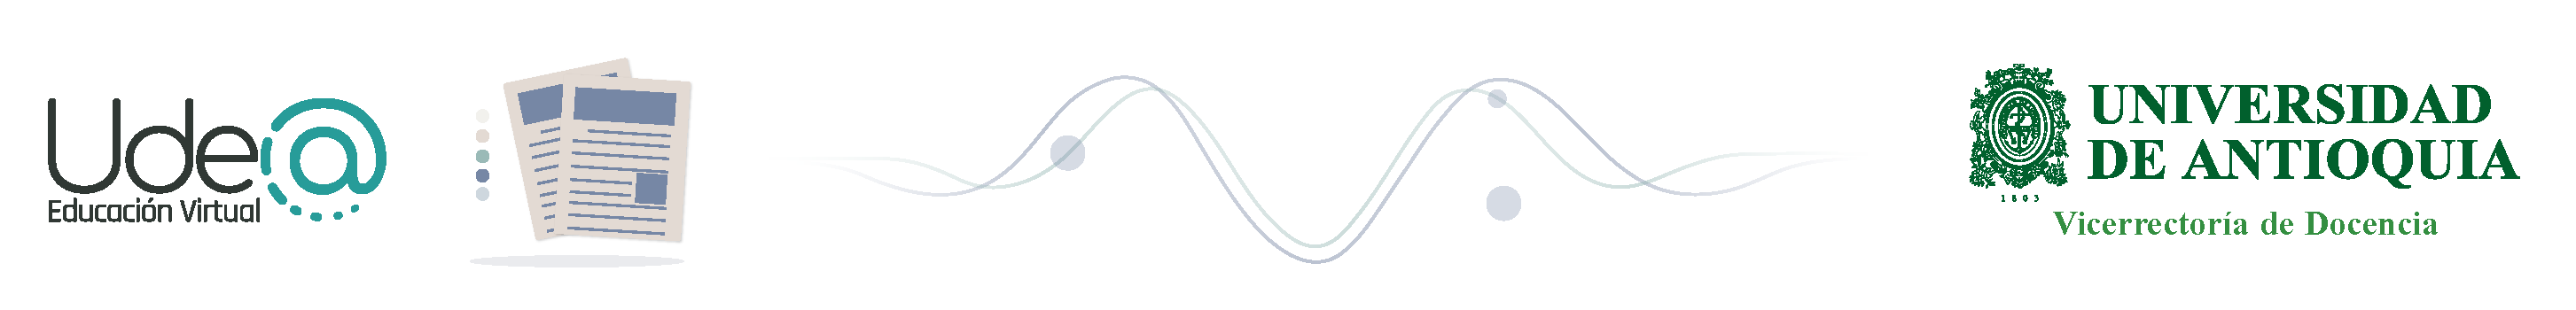

# Computer Vision Intro Part I



**Tratamiento de Señales III**

*Prof. Hernán Felipe García Arias*

*Facultad de Ingeniería*

*Universidad de Antioquia*

*2022-1*

## Numpy Tutorial and Introduction

Images can be represented as **matrices** (2D arrays) or 3D **tensors** (in order to get RGB channels). [OpenCV](https://opencv.org/), a popular Computer Vision package, is a great tool to work with images, and provides a lot really useful tools that you can use to edit, transform, and work with your images. Python's OpenCV is actually a **wrapper** on top of the C/C++ implementation of the library, which makes it really fast. In addition, everything in OpenCV can be converted to and from [Numpy](http://www.numpy.org/) arrays, a really nice way to work with multidimensional objects like matrices and tensors. Like OpenCV, all Python calls to the Numpy library actually get converted and executed into C, which makes it really fast as well.

As we work through things like camera matrices, calibration, homography matrices, etc, it'll be important to know how to work with these libraries, and understand what you can (and can't do with them).


In [ ]:
!wget "https://www.duckietown.org/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg" -O dt.jpg
    
import numpy as np

--2021-04-21 14:24:02--  https://www.duckietown.org/wp-content/uploads/2018/05/duckietown_nice-1024x683.jpg
Resolving www.duckietown.org (www.duckietown.org)... 172.67.73.78, 104.26.2.173, 104.26.3.173
Connecting to www.duckietown.org (www.duckietown.org)|172.67.73.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154197 (151K) [image/jpeg]
Saving to: ‘dt.jpg’

dt.jpg              100%[===================>] 150.58K  --.-KB/s    in 0.03s   

2021-04-21 14:24:02 (5.46 MB/s) - ‘dt.jpg’ saved [154197/154197]

[2. 3. 4.]
[[2. 2.]
 [3. 5.]]
Norm1 57.75598326074734
Norm2 [5.80080145 5.83683151 5.98472515 6.07679438 5.60906077 5.63133443
 5.88175652 5.69104544 5.35296154 5.55219575 5.81679473 5.86613286
 6.0888397  6.09995968 5.71188728 5.935878   6.22510278 5.61336081
 5.16178666 5.56432382 5.7569801  5.64199407 5.5900295  5.89835352
 5.74236515 5.73106508 5.50729478 5.45094475 5.38440011 5.52411121
 5.57500326 5.6643373  5.90748339 5.6106011  5.76426244 5.68573687


## OpenCV


<class 'numpy.ndarray'>


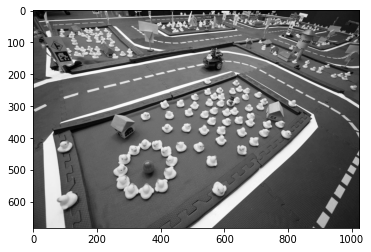

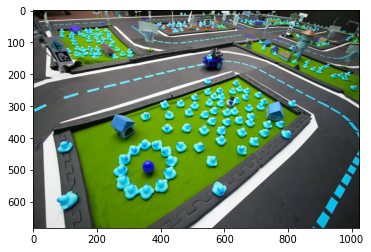

(683, 1024) (683, 1024, 3)


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2


# Load in Grayscale
img = cv2.imread('./dt.jpg', 0)
img1= img
# The underlying representation is a numpy array!
print(type(img))

plt.imshow(img,cmap='gray')
plt.show()

img2 = cv2.imread('./dt.jpg')

plt.imshow(img2)
plt.show()

# This would work normally, but it will crash the colab kernel, so don't.
# cv2.imshow('Image', img) # run locally


print(img.shape,img2.shape)

Notice anything different about the above image? You'll see that the colors are off - this is because OpenCV uses a BGR ordering of their image channels, whereas when you want to plot in something other than OpenCV, you'll need to convert it. In Colab, you cannot use the standard OpenCV 'imshow' function, so we use matplotlib.

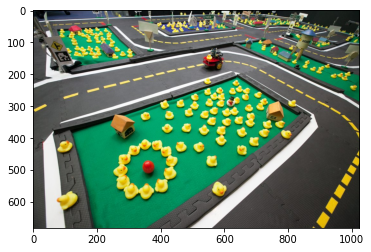

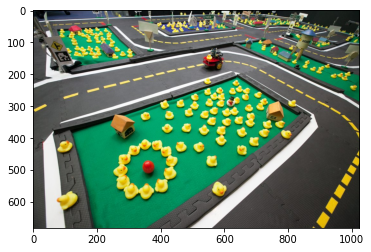

In [ ]:
imgrgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(imgrgb)
plt.show()
# (683, 1024, 0) : se refiere a la paleta azul
# (683, 1024, 1) : paleta verde
# (683, 1024, 2) : paleta roja
# Or, use fun numpy functions / indexing!
imgrgb = img2[:,:,::-1]
plt.imshow(imgrgb)
plt.show()


### Common Image Manipulations

OpenCV is super useful for doing lots of image transformations, and we will experiment with some of the basic ones below. 

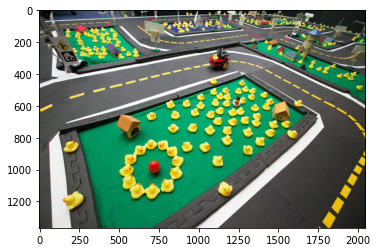

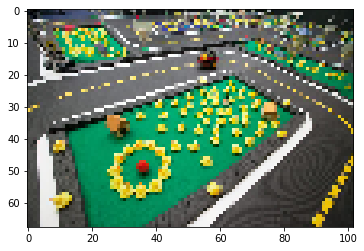

In [ ]:
# Expanding
res = cv2.resize(imgrgb, None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)
plt.show()

# Shrinking
res = cv2.resize(imgrgb, None,fx=.1, fy=.1, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)
plt.show()

# What are some practical constraints that have to do with image resizing?

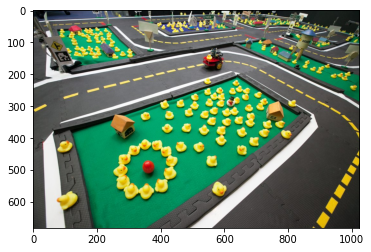

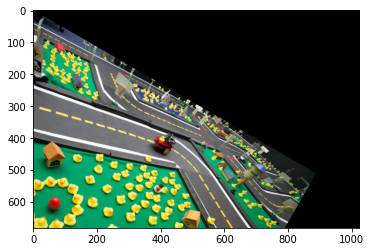

In [ ]:
#@title Transformation Parameters { run: "auto" }

theta_degrees = 30 #@param {type:"slider", min:-180, max:180, step:10}
shift_x = 0 #@param {type:"slider", min:-100, max:100, step:2}
shift_y = 0 #@param {type:"slider", min:-100, max:100, step:2}

# We can also play around with rotations by defining our M matrix, 
# which has the form:
"""
| cos(theta) -sin(theta) tx | 
| sin(theta)  cos(theta) ty |
"""

rows, cols, _ = imgrgb.shape

radians = theta_degrees * np.pi / 180
M = [
        [np.cos(radians), -np.sin(radians), shift_x], 
        [np.sin(radians),  np.cos(radians), shift_y]
    ]

M = np.array(M)
rows += int(shift_x)
cols += int(shift_y)

res = cv2.warpAffine(imgrgb, M, (cols,rows))

plt.imshow(imgrgb)
plt.show()
plt.imshow(res)
plt.show()




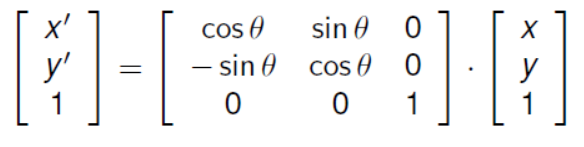

In [ ]:
# Transformación afín de rotación
angulo = 30
radians = angulo * np.pi / 180
myM = [
        [np.cos(radians), np.sin(radians), 0], 
        [-np.sin(radians),  np.cos(radians), 0],
        [0, 0, 1]
    ]

posx = 0
posy = 1000
vect1 = np.array([posx,posy,1.])
newPos = np.array(myM).dot(vect1)

print(newPos)

[500.         866.02540378   1.        ]


### (Slightly) Advanced Image Manipulation Techniques

For certain tasks (i.e object detection), the image needs to be processed before it is fed into our module, for better results. Here, we go over some advanced image manipulation techniques.

Things like blurring, smoothing, and thresholding can be useful for things where we can make strong assumptions. For example, when we know our lane markings will be white, we can threshold our image pixels to filter out the values that aren't close enough to "white", which is represented (in RGB / BGR) as (255, 255, 255)

You can also do things like Background Subtraction, which will expose differences in between frames.

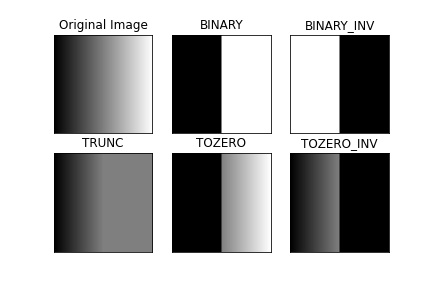

<class 'float'>


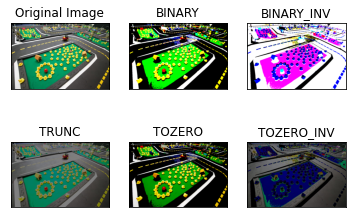

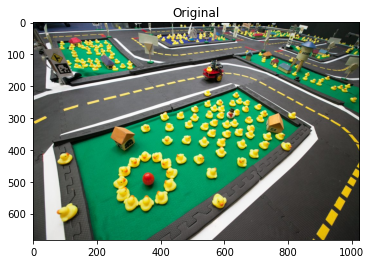

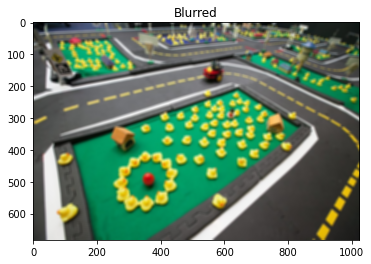

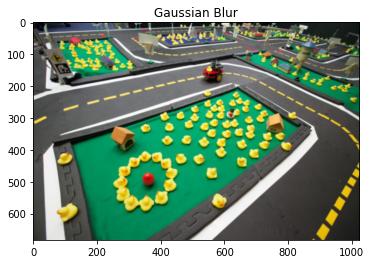

In [ ]:
# make things easier!
img = imgrgb
#img = img1

# Thresholding is cool
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
print(type(ret))

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Blurring - smoothes the image out
blur = cv2.blur(img,(10, 10))
gblur = cv2.GaussianBlur(imgrgb,(5,5),0)

plt.imshow(img), plt.title('Original')
plt.show()
plt.imshow(blur), plt.title('Blurred')
plt.show()
plt.imshow(gblur),plt.title('Gaussian Blur')
plt.show()


In [ ]:
cv2.threshold?

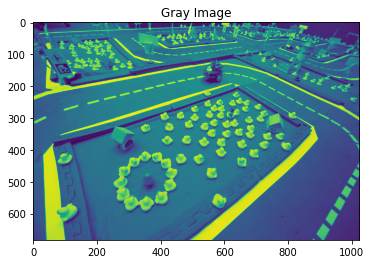

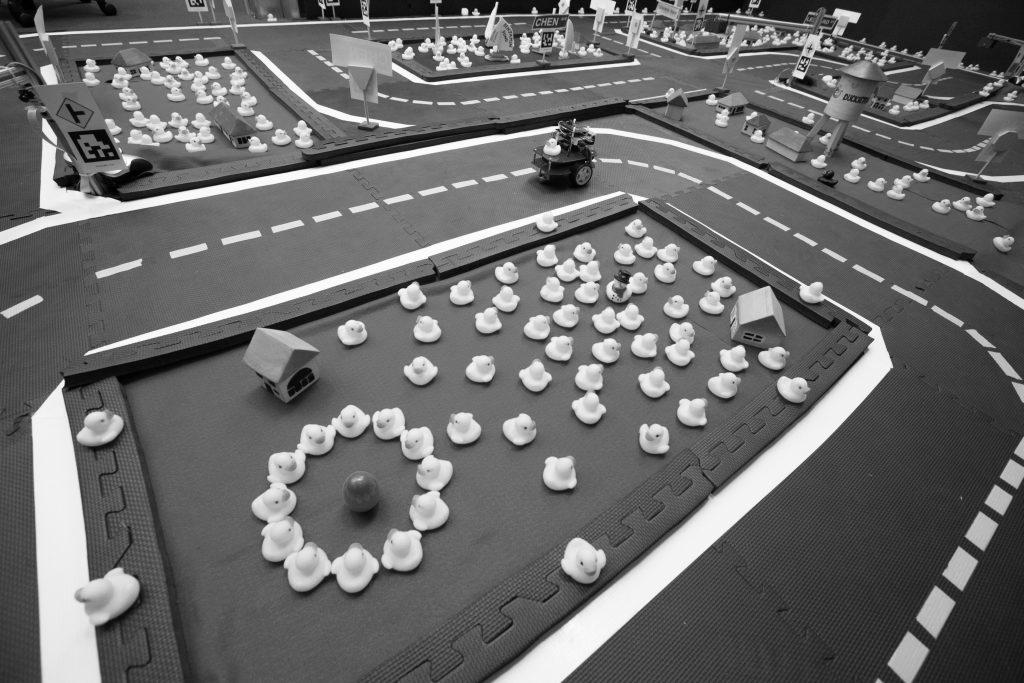

In [ ]:
Imgray = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2GRAY)
plt.imshow(Imgray), plt.title('Gray Image')
plt.show()
#cv2.imshow? # es para las sesiones de anaconda
from google.colab.patches import cv2_imshow # for image display
cv2_imshow(Imgray)
# skimage sklearn

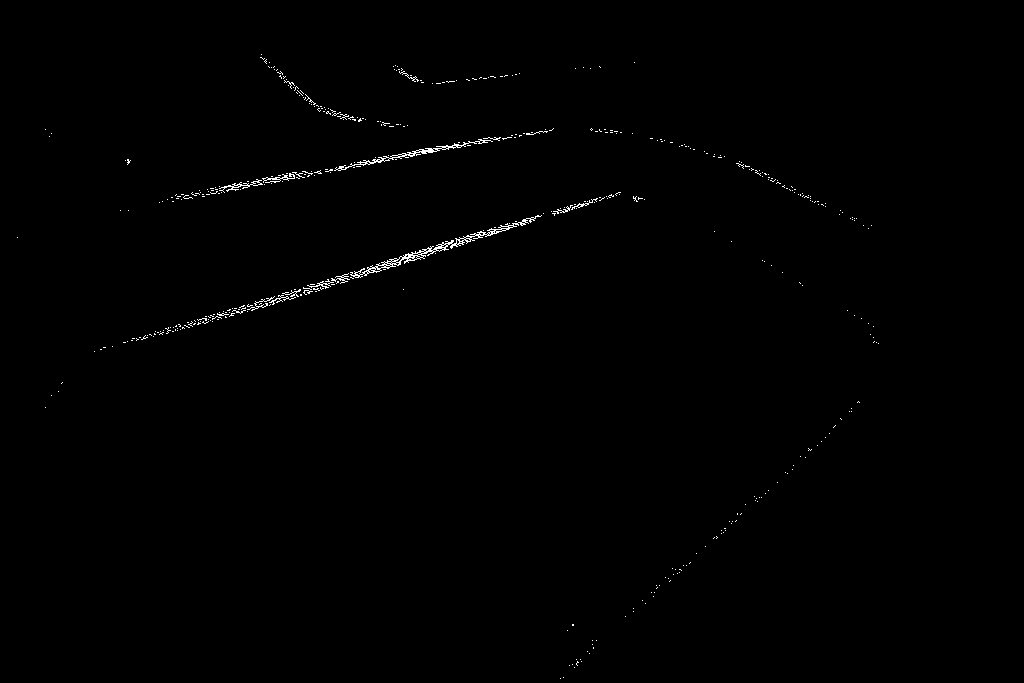

In [ ]:
h = 250 #@param {type:"slider", min:0, max:255, step:10}
ret,thresh1 = cv2.threshold(Imgray,h,255,cv2.THRESH_BINARY)
cv2_imshow(thresh1)

# Widgets tutorials


 https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html